In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
df_flood=pd.read_csv('flood_risk_dataset_india.csv')
print(df_flood.head())

    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184   

In [ ]:
print(df_flood.isnull().sum())
print(df_flood['Land Cover'].fillna(df_flood['Land Cover'].mode()))
print(df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()))

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64


In [14]:
df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()[0], inplace=True)
df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()[0], inplace=True)

df_flood['Latitude'].fillna(df_flood['Latitude'].mean(), inplace=True)
df_flood['Longitude'].fillna(df_flood['Longitude'].mean(), inplace=True)
df_flood['Rainfall (mm)'].fillna(df_flood['Rainfall (mm)'].mean(), inplace=True)
df_flood['Temperature (°C)'].fillna(df_flood['Temperature (°C)'].mean(), inplace=True)
df_flood['Humidity (%)'].fillna(df_flood['Humidity (%)'].mean(), inplace=True)
df_flood['River Discharge (m³/s)'].fillna(df_flood['River Discharge (m³/s)'].mean(), inplace=True)
df_flood['Water Level (m)'].fillna(df_flood['Water Level (m)'].mean(), inplace=True)
df_flood['Elevation (m)'].fillna(df_flood['Elevation (m)'].mean(), inplace=True)
df_flood['Land Cover'].fillna(df_flood['Land Cover'].mode()[0], inplace=True)
df_flood['Population Density'].fillna(df_flood['Population Density'].mean(), inplace=True)
df_flood['Historical Floods'].fillna(df_flood['Historical Floods'].mean(), inplace=True)
df_flood['Flood Occurred'].fillna(df_flood['Flood Occurred'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15064\2756350457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flood['Soil Type'].fillna(df_flood['Soil Type'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15064\2756350457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [15]:
size_mapp_land={'Agricultural': 1, 'Desert': 2, 'Water Body': 3, 'Forest': 4, 'Urban': 5}
df_flood['Land Cover_encodeed'] = df_flood['Land Cover'].map(size_mapp_land)
size_mapp_soil={'Clay': 1, 'Loam': 2, 'Sandy': 3,'Silt': 4, 'Peat': 5}
df_flood['Soil Type_encodeed'] = df_flood['Soil Type'].map(size_mapp_soil)
print(df_flood.isnull().sum())

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
Land Cover_encodeed       0
Soil Type_encodeed        0
dtype: int64


In [16]:
x = df_flood[['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 
			  'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Land Cover_encodeed', 
			  'Soil Type_encodeed', 'Population Density', 'Infrastructure', 'Historical Floods']]
y = df_flood['Flood Occurred']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [18]:
accuray_random=model.score(x_test, y_test)
print("Accuracy of Random Forest:", accuray_random)

Accuracy of Random Forest: 1.0


In [19]:
y_pred = model.predict(x_test)  # ← real, untouched test set
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      2023
   macro avg       1.00      1.00      1.00      2023
weighted avg       1.00      1.00      1.00      2023



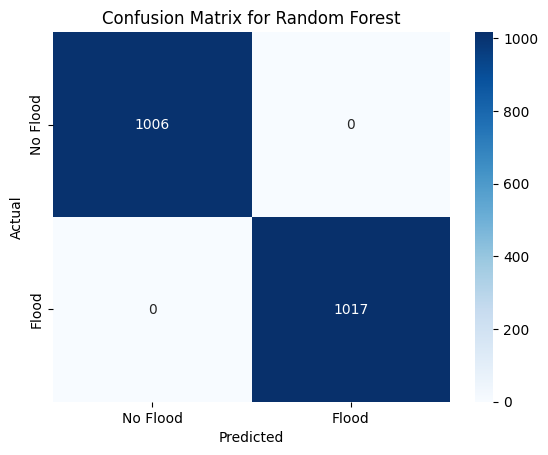

flood recall percentage : 100.00%
flood precision percentage : 100.00%
no flood recall percentage : 100.00%
no flood precision percentage : 100.00%
classification_report
              precision    recall  f1-score   support

    No Flood       1.00      1.00      1.00      1006
       Flood       1.00      1.00      1.00      1017

    accuracy                           1.00      2023
   macro avg       1.00      1.00      1.00      2023
weighted avg       1.00      1.00      1.00      2023



In [20]:
confusion_RF=confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_RF, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()
print(f"flood recall percentage : {(confusion_RF[1,1]/(confusion_RF[1,1]+confusion_RF[1,0]))*100:.2f}%")
print(f"flood precision percentage : {(confusion_RF[1,1]/(confusion_RF[1,1]+confusion_RF[0,1]))*100:.2f}%")
print(f"no flood recall percentage : {(confusion_RF[0,0]/(confusion_RF[0,0]+confusion_RF[0,1]))*100:.2f}%")
print(f"no flood precision percentage : {(confusion_RF[0,0]/(confusion_RF[0,0]+confusion_RF[1,0]))*100:.2f}%")
print("classification_report")
print(classification_report(y_test, y_pred, target_names=['No Flood', 'Flood']))


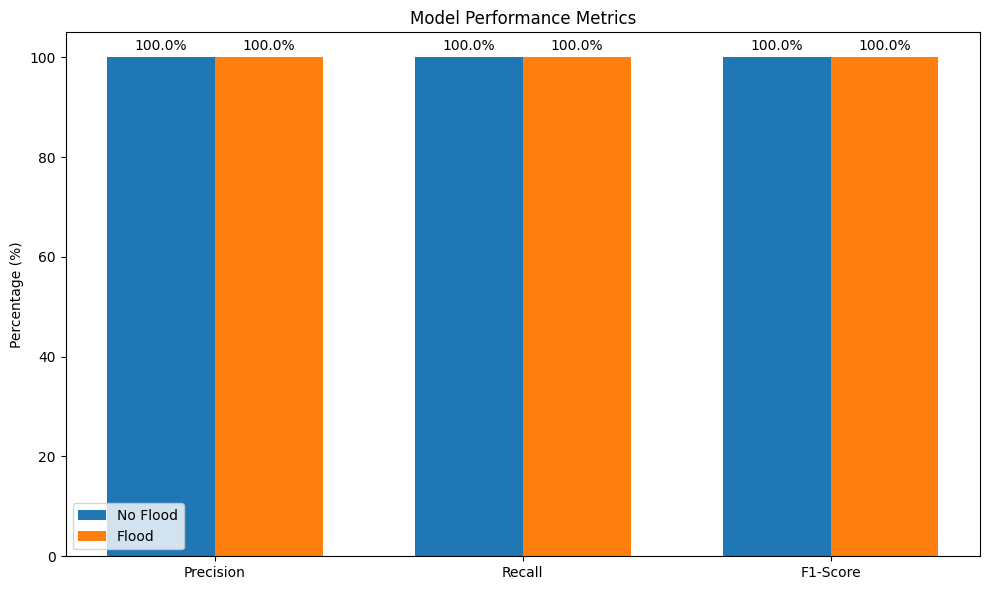

In [24]:
# Extract metrics from confusion matrix
metrics = {
    'Precision': [(confusion_RF[0,0]/(confusion_RF[0,0]+confusion_RF[1,0]))*100, 
                  (confusion_RF[1,1]/(confusion_RF[1,1]+confusion_RF[0,1]))*100],
    'Recall': [(confusion_RF[0,0]/(confusion_RF[0,0]+confusion_RF[0,1]))*100, 
               (confusion_RF[1,1]/(confusion_RF[1,1]+confusion_RF[1,0]))*100],
    'F1-Score': [(2 * confusion_RF[0,0]) / (2 * confusion_RF[0,0] + confusion_RF[1,0] + confusion_RF[0,1]) * 100,
                 (2 * confusion_RF[1,1]) / (2 * confusion_RF[1,1] + confusion_RF[0,1] + confusion_RF[1,0]) * 100]
}

# Create bar plot
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [metrics[m][0] for m in metrics], width, label='No Flood')
rects2 = ax.bar(x + width/2, [metrics[m][1] for m in metrics], width, label='Flood')

ax.set_ylabel('Percentage (%)')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics.keys())
ax.legend()

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [23]:
import joblib
joblib.dump(model, 'floodRF_model.pkl')

['floodRF_model.pkl']